In [1]:
import numpy as np
import math
import csv
import glob
import pandas as pd
from matplotlib import pyplot
from IPython.display import HTML, display
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.integrate as integrate
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 20

In [3]:
import plotfunctions
%run plotfunctions.py

## Experiments - Data Processing
- Power = 1 Watt
- Volumetric Airflow Rate = 0.5 L/min
- Trials = 3 

In [4]:
### Experiments: Raw Data
# t=trial, T=sample,T1:2mm,T2:r=0mm (Center),T3:r=1mm,T4:r=4mm 
tempE = pd.read_csv('data_exp/exp_1W_0.5LPM.csv')  # Power=1 Watt, Volumetric Airflow=0.5 L/min
# dataE = pd.read_csv('data_exp/Exp_1W_1.65LPM.csv') # Power 1 Watt, Volumetric Airflow=1.65 L/min
timeE = tempE['Time']
tempET1 = [tempE['T1_t1'],tempE['T1_t2'],tempE['T1_t3']]
tempET2 = [tempE['T2_t1'],tempE['T2_t2'],tempE['T2_t3']]
tempET3 = [tempE['T3_t1'],tempE['T3_t2'],tempE['T3_t3']]
tempET4 = [tempE['T4_t1'],tempE['T4_t2'],tempE['T4_t3']]
tempE.tail()

,Time,T1_t1,T2_t1,T3_t1,T4_t1,T1_t2,T2_t2,T3_t2,T4_t2,T1_t3,T2_t3,T3_t3,T4_t3
916,229.00,0.3,0.34,0.27,0.25,0.23,0.2,0.15,0.26,0.1,0.06,0.16,0.04
917,229.25,0.3,0.34,0.27,0.25,0.13,0.2,0.15,0.16,0.1,0.06,-0.04,0.04
918,229.50,0.3,0.34,0.27,0.25,0.13,0.1,0.15,0.16,0.1,0.06,-0.04,0.04
919,229.75,0.3,0.34,0.17,0.25,0.23,0.2,0.15,0.26,0.1,0.06,0.16,0.04
920,230.00,0.3,0.34,0.27,0.25,0.23,0.2,0.15,0.16,0.1,0.06,0.16,0.04


In [5]:
### Experiments Metrics: mean & standard deviation over 3 samples
i = 75 # Start here because there are a lot of power off values. 
avg0,avg1,avg2,avg4 = [],[],[],[] 
sd0,sd1,sd2,sd4 = [],[],[],[]
max0,max1,max2,max4 = [],[],[],[]
while i < 150:
    a4 = [tempET4[0][i],tempET4[1][i],tempET4[2][i]] #4mm
    a2 = [tempET1[0][i],tempET1[1][i],tempET1[2][i]] #2mm
    a1 = [tempET3[0][i],tempET3[1][i],tempET3[2][i]] #1mm     
    a0 = [tempET2[0][i],tempET2[1][i],tempET2[2][i]] #center
    avg0.append(np.average(a0))
    avg1.append(np.average(a1))
    avg2.append(np.average(a2))
    avg4.append(np.average(a4))
    sd0.append(np.std(a0))
    sd1.append(np.std(a1))
    sd2.append(np.std(a2))
    sd4.append(np.std(a4))
    max0.append(np.max(a0))
    max1.append(np.max(a1))
    max2.append(np.max(a2))
    max4.append(np.max(a4))
    i +=1

## Experiments - Data

In [6]:
# timeE,avg0,u0,l0,tempET2
# timeE,avg1,u1,l1,tempET3
# timeE,avg2,u2,l2,tempET1
# timeE,avg4,u4,l4,tempET4




# Simulation - Data

In [7]:
tempS1 = pd.read_csv("Samples/output/New_Samples/outputSample1.csv",skiprows = 4)
tempS2 = pd.read_csv("Samples/output/New_Samples/outputSample2.csv",skiprows = 4)
tempS3 = pd.read_csv("Samples/output/New_Samples/outputSample3.csv",skiprows = 4)
tempS4 = pd.read_csv("Samples/output/New_Samples/outputSample4.csv",skiprows = 4)
tempS5 = pd.read_csv("Samples/output/New_Samples/outputSample5.csv",skiprows = 4)
tempS6 = pd.read_csv("Samples/output/New_Samples/outputSample6.csv",skiprows = 4)
tempS7 = pd.read_csv("Samples/output/New_Samples/outputSample7.csv",skiprows = 4)
tempS8 = pd.read_csv("Samples/output/New_Samples/outputSample8.csv",skiprows = 4)
tempS9 = pd.read_csv("Samples/output/New_Samples/outputSample9.csv",skiprows = 4)
tempS10 = pd.read_csv("Samples/output/New_Samples/outputSample10.csv",skiprows = 4)
tempSLab = tempS1.columns # header labels

### QOI = Max Temperature 
At the 1mm above the mouthpiece, over 10 samples. 

In [8]:
i,s,uq = 1,1,[]
tempS1Max,tempS2Max,tempS3Max,tempS4Max,tempS5Max = [],[],[],[],[]
tempS6Max,tempS7Max,tempS8Max,tempS9Max,tempS10Max = [],[],[],[],[]
while i < len(tempSLab):
    tempS1Max.append( np.max(tempS1 [tempSLab[i]])-298.15)
    tempS2Max.append( np.max(tempS2 [tempSLab[i]])-298.15)
    tempS3Max.append( np.max(tempS3 [tempSLab[i]])-298.15)
    tempS4Max.append( np.max(tempS4 [tempSLab[i]])-298.15)
    tempS5Max.append( np.max(tempS5 [tempSLab[i]])-298.15)
    tempS6Max.append( np.max(tempS6 [tempSLab[i]])-298.15)
    tempS7Max.append( np.max(tempS7 [tempSLab[i]])-298.15)
    tempS8Max.append( np.max(tempS8 [tempSLab[i]])-298.15)
    tempS9Max.append( np.max(tempS9 [tempSLab[i]])-298.15)
    tempS10Max.append(np.max(tempS10[tempSLab[i]])-298.15)
    i+=1;
tempMax =pd.DataFrame([tempS1Max,tempS2Max,tempS3Max,tempS4Max,tempS5Max,
         tempS6Max,tempS7Max,tempS8Max,tempS9Max,tempS10Max])
tempMax.columns = tempSLab[1:]
while s < len(tempSLab):
    x = str(np.mean(tempMax[tempSLab[s]]))
    y = str(np.std(tempMax[tempSLab[s]]))
    uq.append(x + '+/- '+ y)
    s+=1;
maxUQ = pd.DataFrame(uq)
maxUQtrans = maxUQ.transpose()
maxUQtrans.columns = tempSLab[1:]
pd.DataFrame([maxUQtrans['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'],
maxUQtrans['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']],
             ['r=0mm','r=1mm','r=2mm','r=3mm','r=4mm'])

,0
r=0mm,3.024142400000028+/- 0.06497557027406756
r=1mm,2.8387178000000177+/- 0.06167291868040537
r=2mm,2.527697700000016+/- 0.05746112082452293
r=3mm,1.7160247000000255+/- 0.041136931144782195
r=4mm,0.8283265000000313+/- 0.019351051895184514


## Data by time
This finds the mean and standard deviation around each point accounting for uncertainties in both the input and the output locations.

In [9]:
# Experiments
timesteps = [0.100000001,1.0,2.0,4.0,5.0,10.0,11.0,12.0] #timesteps for data collection
timeExp = timeE[75:150]-20
timeExp = list(timeExp)
timeExp.index(timesteps[1])
timeEId = [timeExp.index(0),timeExp.index(timesteps[1]),timeExp.index(timesteps[2]),
           timeExp.index(timesteps[3]),timeExp.index(timesteps[4]),timeExp.index(timesteps[5]),
           timeExp.index(timesteps[6]),timeExp.index(timesteps[7])]
avg_ts_E, sd_ts_E = [], []
i = 0
while i < len(timeEId):
    avg_ts_E.append([avg0[timeEId[i]],avg1[timeEId[i]],avg2[timeEId[i]],avg4[timeEId[i]]])
    sd_ts_E.append([sd0[timeEId[i]],sd1[timeEId[i]],sd2[timeEId[i]],sd4[timeEId[i]]])
    i+=1

In [10]:
# Identifying timestep indecies
time_E = list(timeE[75:150]-20)
index = time_E.index(0.0) # find index at time = 5.0[s]
# time_E[index],sd0[index];avg0[index];avgTS_ts5[0]
exp4 = [tempET4[0][index+75],tempET4[1][index+75],tempET4[2][index+75]] #4mm
exp2 = [tempET1[0][index+75],tempET1[1][index+75],tempET1[2][index+75]] #2mm
exp1 = [tempET3[0][index+75],tempET3[1][index+75],tempET3[2][index+75]] #1mm     
exp0 = [tempET2[0][index+75],tempET2[1][index+75],tempET2[2][index+75]] #center

In [11]:
# Collecting timestep data
# Radial = 0 mm, Temporal = 0,2,5,10,11,12 [s] 
indexN = time_E.index(0.0) 
normSimR0T0 = np.random.normal(avgTS_ts0[0], sdTS_ts0[0], 100000) 
normSimR1T0 = np.random.normal(avgTS_ts0[1], sdTS_ts0[1], 100000) 
normSimR2T0 = np.random.normal(avgTS_ts0[2], sdTS_ts0[2], 100000) 
normSimR4T0 = np.random.normal(avgTS_ts0[3], sdTS_ts0[3], 100000) 

normExpR0T0 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR1T0 = np.random.normal(avg1[indexN], sd1[indexN],100000)  
normExpR2T0 = np.random.normal(avg2[indexN], sd2[indexN],100000)  
normExpR4T0 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T0  = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T0  = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T0  = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T0  = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT0 = [expR0T0,expR1T0,expR2T0,expR4T0]

indexN = time_E.index(2.0) 
normSimR0T2 = np.random.normal(avgTS_ts2[0], sdTS_ts2[0], 100000) 
normSimR1T2 = np.random.normal(avgTS_ts2[1], sdTS_ts2[1], 100000) 
normSimR2T2 = np.random.normal(avgTS_ts2[2], sdTS_ts2[2], 100000) 
normSimR4T2 = np.random.normal(avgTS_ts2[3], sdTS_ts2[3], 100000) 
normExpR0T2 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR1T2 = np.random.normal(avg1[indexN], sd1[indexN],100000)  
normExpR2T2 = np.random.normal(avg2[indexN], sd2[indexN],100000)  
normExpR4T2 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T2  = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T2  = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T2  = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T2  = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT2 = [expR0T2,expR1T2,expR2T2,expR4T2]

indexN = time_E.index(5.0) 
normSimR0T5 = np.random.normal(avgTS_ts4[0], sdTS_ts4[0], 100000) 
normSimR1T5 = np.random.normal(avgTS_ts4[1], sdTS_ts4[1], 100000) 
normSimR2T5 = np.random.normal(avgTS_ts4[2], sdTS_ts4[2], 100000) 
normSimR4T5 = np.random.normal(avgTS_ts4[3], sdTS_ts4[3], 100000) 

normExpR0T5 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR1T5 = np.random.normal(avg1[indexN], sd1[indexN],100000)  
normExpR2T5 = np.random.normal(avg2[indexN], sd2[indexN],100000)  
normExpR4T5 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T5  = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T5  = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T5  = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T5  = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT5 = [expR0T5,expR1T5,expR2T5,expR4T5]

indexN = time_E.index(10.0) 
normSimR0T10 = np.random.normal(avgTS_ts5[0], sdTS_ts5[0], 100000) 
normSimR1T10 = np.random.normal(avgTS_ts5[1], sdTS_ts5[1], 100000) 
normSimR2T10 = np.random.normal(avgTS_ts5[2], sdTS_ts5[2], 100000) 
normSimR4T10 = np.random.normal(avgTS_ts5[3], sdTS_ts5[3], 100000) 

normExpR0T10 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR1T10 = np.random.normal(avg1[indexN], sd1[indexN],100000)  
normExpR2T10 = np.random.normal(avg2[indexN], sd2[indexN],100000)  
normExpR4T10 = np.random.normal(avg4[indexN], sd4[indexN],100000)  
expR0T10 = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T10 = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T10 = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T10 = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT10 = [expR0T10,expR1T10,expR2T10,expR4T10]

indexN = time_E.index(11.0) 
normSimR0T11 = np.random.normal(avgTS_ts6[0], sdTS_ts6[0], 100000) 
normSimR1T11 = np.random.normal(avgTS_ts6[1], sdTS_ts6[1], 100000) 
normSimR2T11 = np.random.normal(avgTS_ts6[2], sdTS_ts6[2], 100000) 
normSimR4T11 = np.random.normal(avgTS_ts6[3], sdTS_ts6[3], 100000) 

normExpR0T11 = np.random.normal(avg0[indexN], sd0[indexN],100000)  
normExpR1T11 = np.random.normal(avg1[indexN], sd1[indexN],100000)  
normExpR2T11 = np.random.normal(avg2[indexN], sd2[indexN],100000)  
normExpR4T11 = np.random.normal(avg4[indexN], sd4[indexN],100000)  

expR0T11 = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T11 = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T11 = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T11 = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT11 = [expR0T11,expR1T11,expR2T11,expR4T11]

indexN = time_E.index(12.0) 
normSimR0T12 = np.random.normal(avgTS_ts7[0], sdTS_ts7[0], 100000) 
normSimR1T12 = np.random.normal(avgTS_ts7[1], sdTS_ts7[1], 100000)
normSimR2T12 = np.random.normal(avgTS_ts7[2], sdTS_ts7[2], 100000)
normSimR4T12 = np.random.normal(avgTS_ts7[3], sdTS_ts7[3], 100000)

normExpR0T12 = np.random.normal(avg0[indexN], sd0[indexN], 100000) 
normExpR1T12 = np.random.normal(avg1[indexN], sd1[indexN], 100000) 
normExpR2T12 = np.random.normal(avg2[indexN], sd2[indexN], 100000) 
normExpR4T12 = np.random.normal(avg4[indexN], sd4[indexN], 100000) 
expR0T12 = [tempET2[0][indexN+75],tempET2[1][indexN+75],tempET2[2][indexN+75]] #center
expR1T12 = [tempET3[0][indexN+75],tempET3[1][indexN+75],tempET3[2][indexN+75]] #1mm
expR2T12 = [tempET1[0][indexN+75],tempET1[1][indexN+75],tempET1[2][indexN+75]] #2mm
expR4T12 = [tempET4[0][indexN+75],tempET4[1][indexN+75],tempET4[2][indexN+75]] #4mm
expRallT12 = [expR0T12,expR1T12,expR2T12,expR4T12]
expRallTall = [expRallT0,expRallT2,expRallT5,expRallT10,expRallT11,expRallT12]

NameError: name 'avgTS_ts0' is not defined

In [ ]:
avgTS_ts6

## Simulation Data Only

In [12]:
# Simulations
headers = tempS1.columns
times = pd.DataFrame([tempS1[headers[0]],tempS2[headers[0]],tempS3[headers[0]],tempS4[headers[0]],tempS5[headers[0]],tempS6[headers[0]],tempS7[headers[0]],tempS8[headers[0]],tempS9[headers[0]],tempS10[headers[0]]])                                                                         
time_list = [tempS1[headers[0]]]
time_list = list(time_list[0][0:])
### These are the means
timesId = [time_list.index(0.00999999978),time_list.index(timesteps[1]),time_list.index(timesteps[2]),
           time_list.index(timesteps[3]),time_list.index(timesteps[4]),time_list.index(timesteps[5]),
           time_list.index(timesteps[6]),time_list.index(timesteps[7])]

avg_ts_S, sd_ts_S = [], []
i = 0
while i < len(timeEId):
    avg_ts_S.append([avg0[timeEId[i]],avg1[timeEId[i]],avg2[timeEId[i]],avg4[timeEId[i]]])
    sd_ts_S.append([sd0[timeEId[i]],sd1[timeEId[i]],sd2[timeEId[i]],sd4[timeEId[i]]])
    i+=1

In [13]:
points = ['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP0, stdSamplesP0 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
points = ['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP1, stdSamplesP1 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
points = ['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']
meanSamplesP2, stdSamplesP2 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
points = ['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP3, stdSamplesP3 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)
points = ['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]','Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]','Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]','Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']
meanSamplesP4, stdSamplesP4 = samples10stas(points,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10)

In [14]:
# timestep =  0.100000001   ,1.0,2.0,4.0,5.0,10.0,11.0,12.0]
avgTS_ts0 = [meanSamplesP0[timesId[0]],meanSamplesP1[timesId[0]],meanSamplesP2[timesId[0]],meanSamplesP4[timesId[0]]]
sdTS_ts0 = [stdSamplesP0[timesId[0]],stdSamplesP1[timesId[0]],stdSamplesP2[timesId[0]],stdSamplesP4[timesId[0]]]
# timestep =  2  
avgTS_ts2 = [meanSamplesP0[timesId[2]],meanSamplesP1[timesId[2]],meanSamplesP2[timesId[2]],meanSamplesP4[timesId[2]]]
sdTS_ts2 = [stdSamplesP0[timesId[2]],stdSamplesP1[timesId[2]],stdSamplesP2[timesId[2]],stdSamplesP4[timesId[2]]]
# timestep =  5  
avgTS_ts4 = [meanSamplesP0[timesId[4]],meanSamplesP1[timesId[4]],meanSamplesP2[timesId[4]],meanSamplesP4[timesId[4]]]
sdTS_ts4 = [stdSamplesP0[timesId[4]],stdSamplesP1[timesId[4]],stdSamplesP2[timesId[4]],stdSamplesP4[timesId[4]]]
# timestep =  10  
avgTS_ts5 = [meanSamplesP0[timesId[5]],meanSamplesP1[timesId[5]],meanSamplesP2[timesId[5]],meanSamplesP4[timesId[5]]]
sdTS_ts5 = [stdSamplesP0[timesId[5]],stdSamplesP1[timesId[5]],stdSamplesP2[timesId[5]],stdSamplesP4[timesId[5]]]
# timestep =  11  
avgTS_ts6 = [meanSamplesP0[timesId[6]],meanSamplesP1[timesId[6]],meanSamplesP2[timesId[6]],meanSamplesP4[timesId[6]]]
sdTS_ts6 = [stdSamplesP0[timesId[6]],stdSamplesP1[timesId[6]],stdSamplesP2[timesId[6]],stdSamplesP4[timesId[6]]]
# timestep =  12  
avgTS_ts7 = [meanSamplesP0[timesId[7]],meanSamplesP1[timesId[7]],meanSamplesP2[timesId[7]],meanSamplesP4[timesId[7]]]
sdTS_ts7 = [stdSamplesP0[timesId[7]],stdSamplesP1[timesId[7]],stdSamplesP2[timesId[7]],stdSamplesP4[timesId[7]]]

# Error Plots

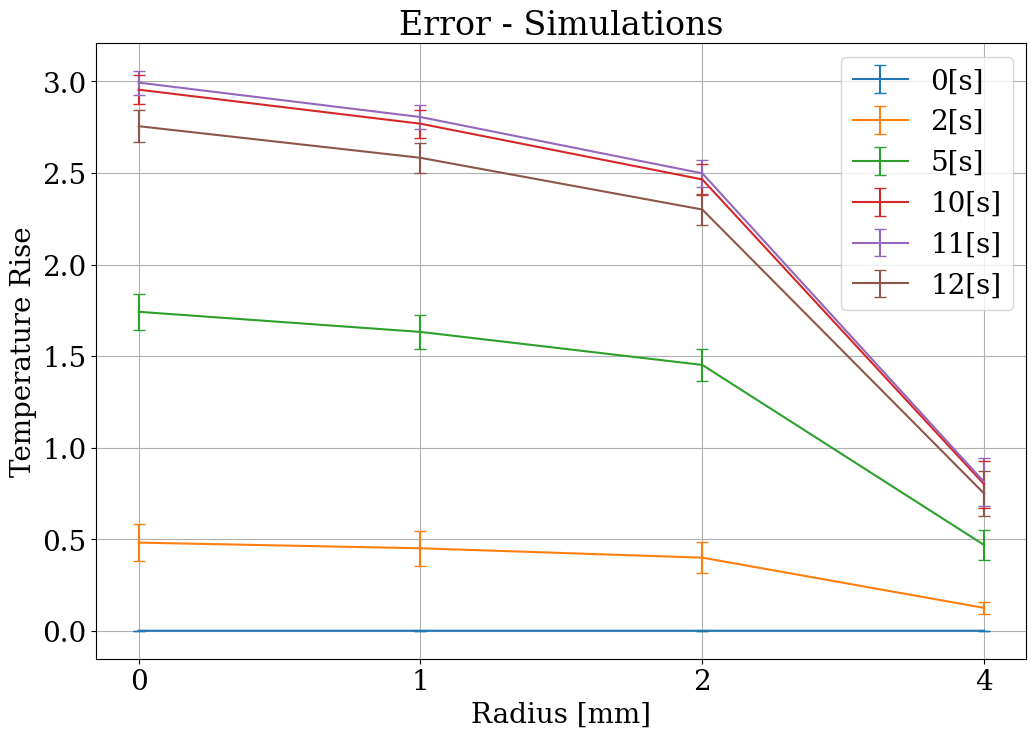

In [15]:
pyplot.figure(figsize=(12,8))
pyplot.title('Error - Simulations')
pyplot.xlabel('Radius [mm]')
pyplot.ylabel('Temperature Rise')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts0), yerr=sdTS_ts0,capsize=4,label='0[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts2), yerr=sdTS_ts2,capsize=4,label='2[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts4), yerr=sdTS_ts4,capsize=4,label='5[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts5), yerr=sdTS_ts5,capsize=4,label='10[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts6), yerr=sdTS_ts6,capsize=4,label='11[s]')
pyplot.errorbar(['0','1','2','4'], np.abs(avgTS_ts7), yerr=sdTS_ts7,capsize=4,label='12[s]')
pyplot.legend(loc='upper right')
# pyplot.xlim(-0.1,5);
pyplot.grid()
pyplot.savefig('figures/Final_Analysis/errorBars_1std_Sim_All.png', dpi=300)

# Box Plots

In [16]:
#tbypoint[point][timestep][sample], 5x6x10
tbypoint = SimSamplesTempbyTime(tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,tempS7,tempS8,tempS9,tempS10,
                         timesId)

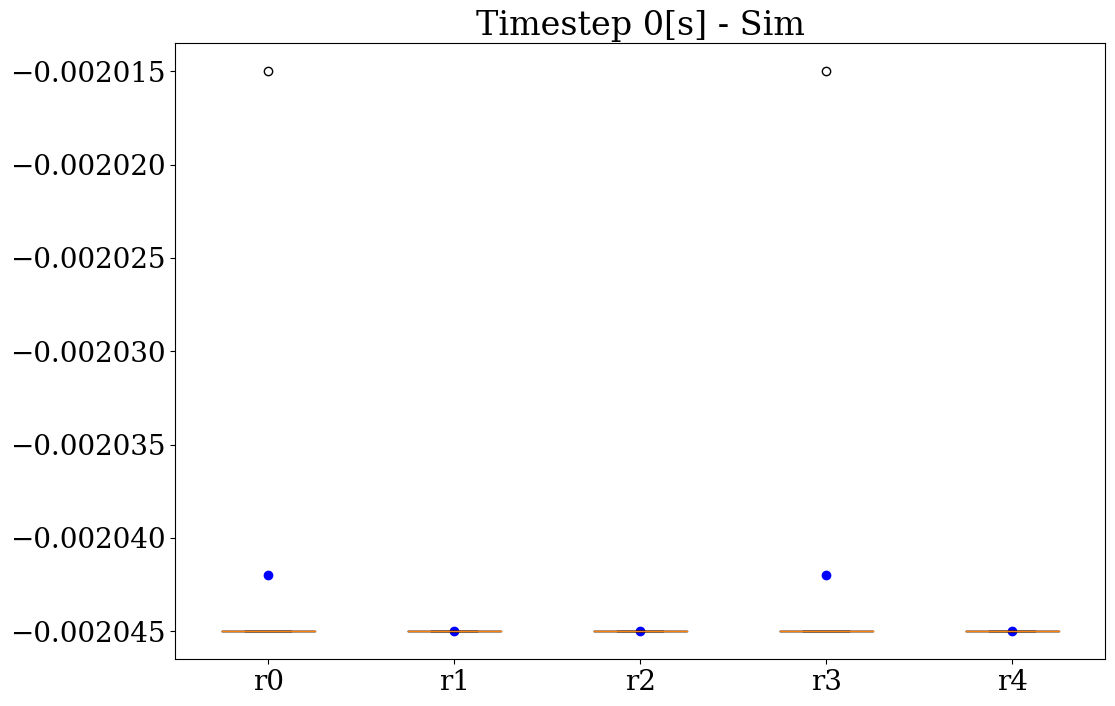

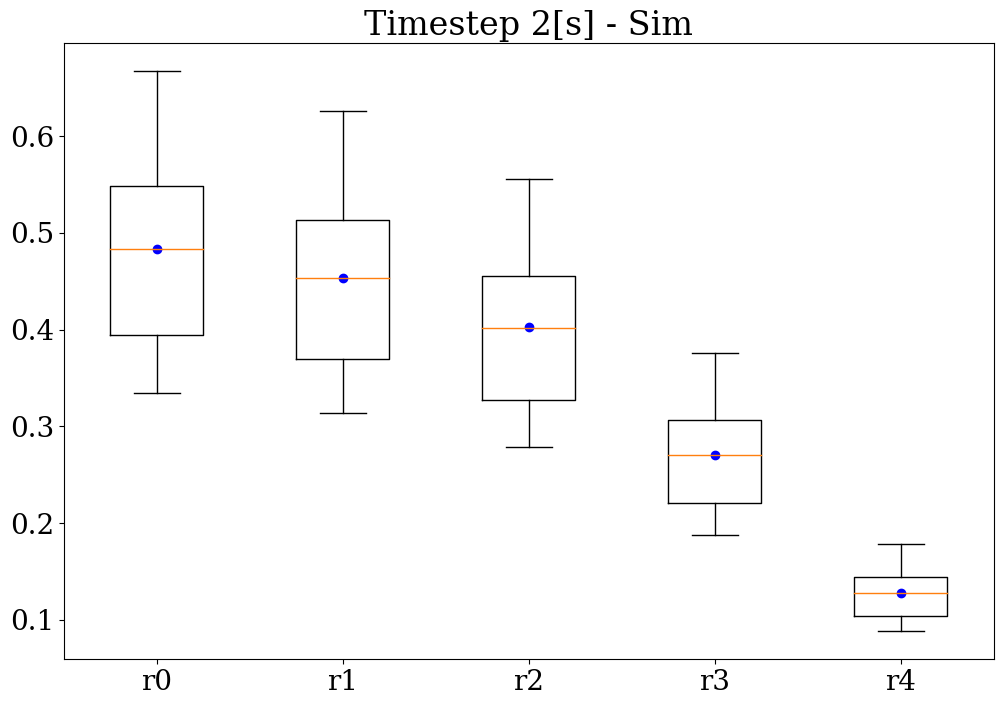

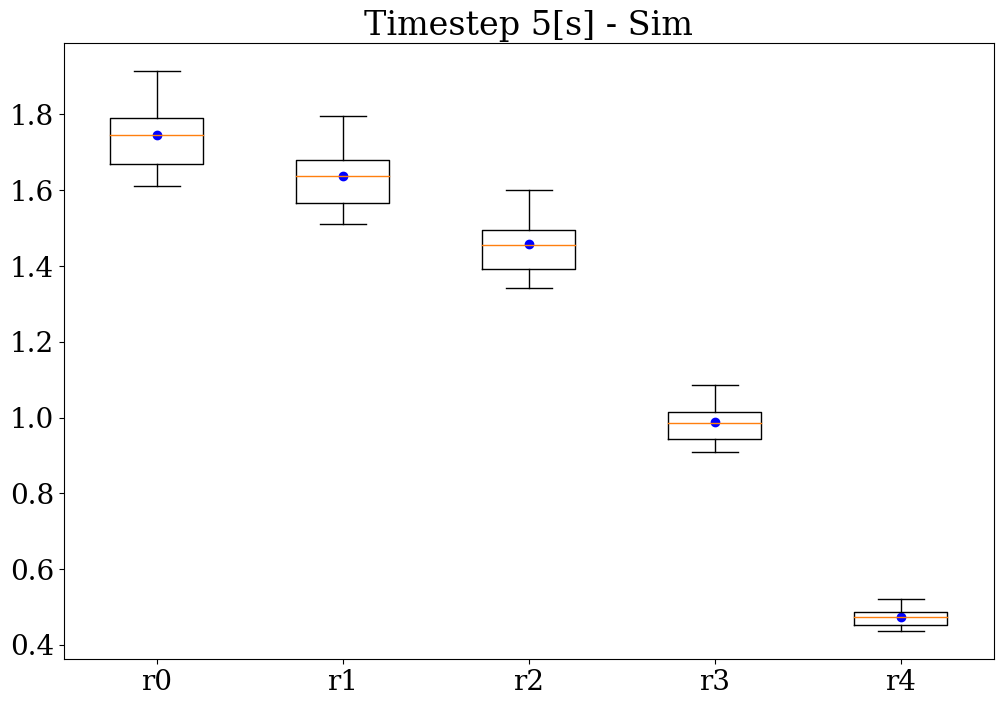

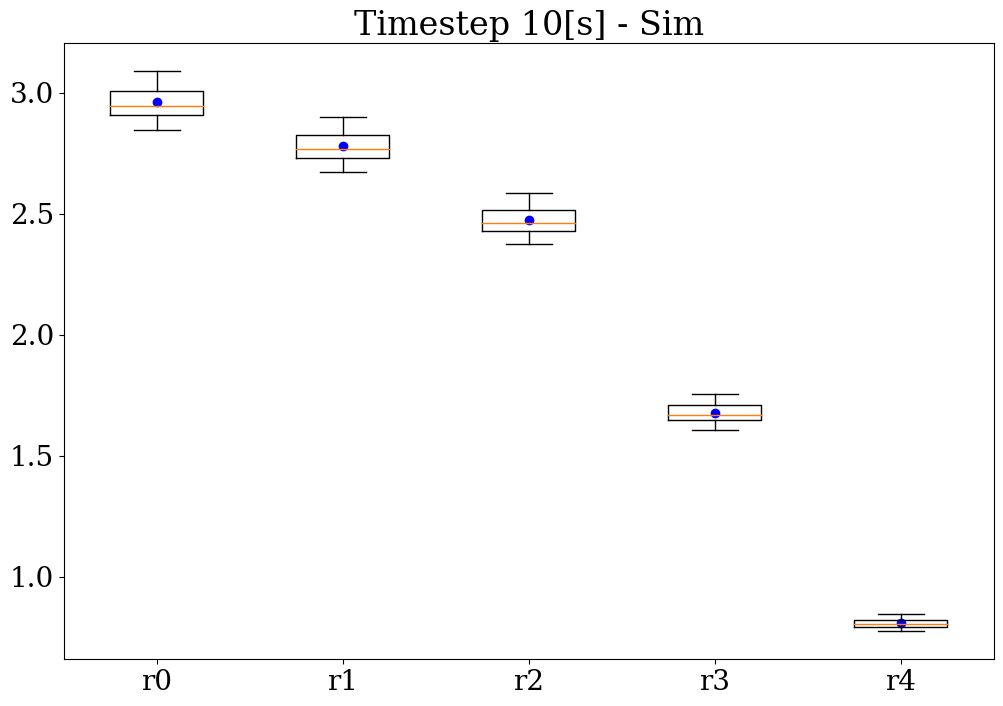

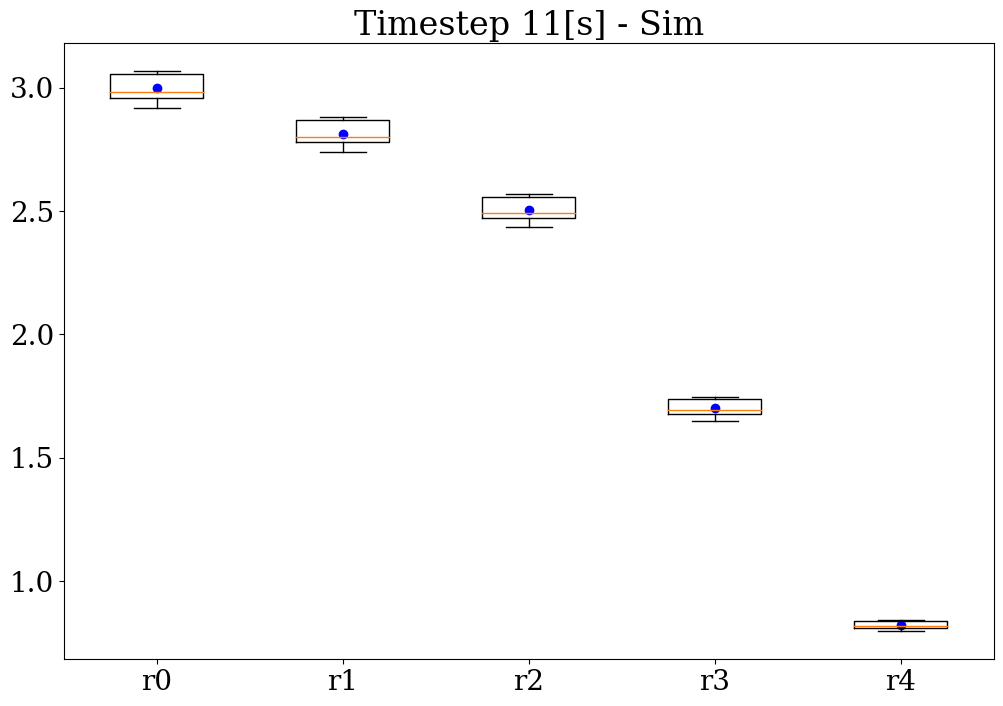

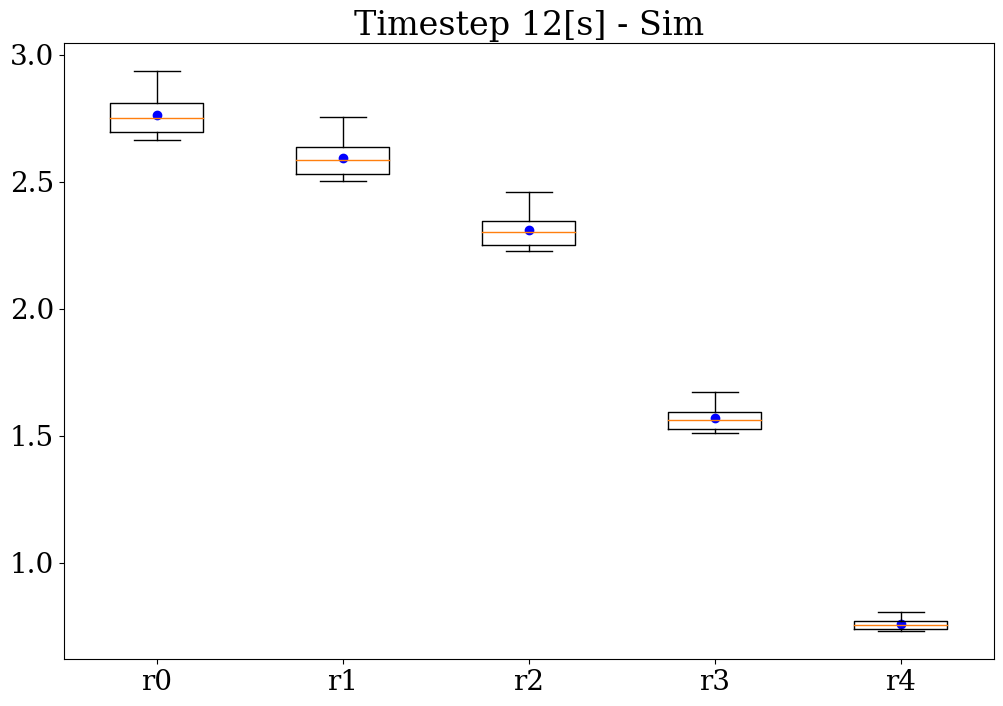

In [17]:
step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
t=[0,2,5,10,11,12]
i = 0;
while i < len(tbypoint[0]):
    pyplot.figure(figsize=(12,8))
    pyplot.boxplot([tbypoint[0][i],tbypoint[1][i],tbypoint[2][i],tbypoint[3][i],tbypoint[4][i]],labels=['r0','r1','r2','r3','r4'])
    pyplot.title('Timestep '+step[i]+' - Sim')
    pyplot.scatter(1,np.mean(tbypoint[0][i]), color='blue')
    pyplot.scatter(2,np.mean(tbypoint[1][i]), color='blue')
    pyplot.scatter(3,np.mean(tbypoint[2][i]), color='blue')
    pyplot.scatter(4,np.mean(tbypoint[3][i]), color='blue')
    pyplot.scatter(5,np.mean(tbypoint[4][i]), color='blue')
    tnum = t[i]
    pyplot.savefig('figures/Final_Analysis/errorBars_sim_t%i.png'%tnum, dpi=300)
    i+=1;

In [18]:
step = ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
t=[0,2,5,10,11,12]
i = 0;
while i < len(t):
    pyplot.figure(figsize=(12,8))
    pyplot.boxplot([expRallTall[i][0],expRallTall[i][1],expRallTall[i][2],expRallTall[i][3]],labels=['r0','r1','r2','r4'])
    pyplot.title('Timestep '+step[i]+' - Exp')
    pyplot.scatter(1,np.mean(expRallTall[i][0]), color='blue')
    pyplot.scatter(2,np.mean(expRallTall[i][1]), color='blue')
    pyplot.scatter(3,np.mean(expRallTall[i][2]), color='blue')
    pyplot.scatter(4,np.mean(expRallTall[i][3]), color='blue')
    tnum = t[i]
    pyplot.savefig('figures/Final_Analysis/errorBars_exp_t%i.png'%tnum, dpi=300)
    i+=1;

NameError: name 'expRallTall' is not defined

<Figure size 1200x800 with 0 Axes>

# Area Metric

## Radial Direction = 0mm

In [ ]:
# Plots radial direction r = 0mm
timesteps = [0.0,2.0,5.0,10.0,11.0,12.0]
exp = [expR0T0,expR0T2,expR0T5,expR0T10,expR0T11,expR0T12]
sim = [tbypoint[0][0],tbypoint[0][1],tbypoint[0][2],tbypoint[0][3],tbypoint[0][4],tbypoint[0][5]]
normExp = [normExpR0T0,normExpR0T2,normExpR0T5,normExpR0T10,normExpR0T11,normExpR0T12]
normSim = [normSimR0T0,normSimR0T2,normSimR0T5,normSimR0T10,normSimR0T11,normSimR0T12]
time_E = list(timeE[75:150]-20)
metricpercent0mm = []
metricdiff0mm = []
s = 0 
for t in timesteps:   
    index = time_E.index(t) # find index at time = 5.0[s]    
    timestep=timeE[index+75]-20
    pyplot.figure(figsize=(20,10)) 
    pyplot.title('Time = {}'.format(timestep))
    pyplot.xlabel('Temperature') 
    pyplot.ylabel('Probability (CDF)') 
    ecdfExp = ECDF(exp[s]) 
    ecdfSim = ECDF(sim[s])
    ecdfExpNorm = ECDF(normExp[s])
    ecdfExp.y[0] = 0
    ecdfExp.x[0] = ecdfExp.x[1]
    ecdfSimNorm = ECDF(normSim[s])    
    pyplot.step(ecdfExp.x,ecdfExp.y,'--o', where='post',label='Experiments')
    pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'-', where='post',label='Normal Exp')
    pyplot.step(ecdfSimNorm.x,ecdfSimNorm.y,'-', where='post',label='Normal Simulations')
    pyplot.step(ecdfSim.x,ecdfSim.y,'--o', where='post',label='Simulations')
#     sns.ecdfplot(data=exp[s],label='Experiments')
#     sns.ecdfplot(data=normExp[s],label='Normal Exp')
#     sns.ecdfplot(data=normSim[s],label='Simulations')
    pyplot.legend()
    pyplot.savefig('figures/Final_Analysis/AreaMetric_r0_t%i.png'%timestep, dpi=150)
    pyplot.show()
    
    # Calculate the integrals of the two cdfs.
    integral1 = integrate.quad(ecdfSimNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    integral2 = integrate.quad(ecdfExpNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    # Raw Data
    integral3 = integrate.quad(ecdfExp, min(ecdfExp.x),max(ecdfExp.x))[0]

    # Return the difference between the two integrals.
    diff1 = np.abs(integral2 - integral1)
    avg1 = np.mean([integral2,integral1])
    metricpercent0mm.append((diff1/avg1)*100)
    metricdiff0mm.append(diff1)
    
#     diff2 = np.abs(integral3 - integral1)
    print('Area Metric (diff in CDFs Norm) =',(diff1/avg1)*100,'%')
#     print('Area Metric (diff in CDFs Exp Norm) =',(diff2/((integral1+integral3)/2))*100)
    s+=1

## Radial Location = 1mm

In [ ]:
# Plots radial direction r = 0mm
timesteps = [0.0,2.0,5.0,10.0,11.0,12.0]
exp = [expR1T0,expR1T2,expR1T5,expR1T10,expR1T11,expR1T12]
sim = [tbypoint[1][0],tbypoint[1][1],tbypoint[1][2],tbypoint[1][3],tbypoint[1][4],tbypoint[1][5]]
normExp = [normExpR1T0,normExpR1T2,normExpR1T5,normExpR1T10,normExpR1T11,normExpR1T12]
normSim = [normSimR1T0,normSimR1T2,normSimR1T5,normSimR1T10,normSimR1T11,normSimR1T12]
time_E = list(timeE[75:150]-20)
metricpercent1mm = []
metricdiff1mm =[]
s = 0 
for t in timesteps:   
    index = time_E.index(t) # find index at time = 5.0[s]    
    timestep=timeE[index+75]-20
    pyplot.figure(figsize=(20,10)) 
    pyplot.title('Time = {}'.format(timestep))
    pyplot.xlabel('Temperature') 
    pyplot.ylabel('Probability (CDF)') 
    ecdfExp = ECDF(exp[s]) 
    ecdfSim = ECDF(sim[s])
    ecdfExpNorm = ECDF(normExp[s])
    ecdfExp.y[0] = 0
    ecdfExp.x[0] = ecdfExp.x[1]
    ecdfSimNorm = ECDF(normSim[s])    
    pyplot.step(ecdfExp.x,ecdfExp.y,'--o', where='post',label='Experiments')
    pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'-', where='post',label='Normal Exp')
    pyplot.step(ecdfSimNorm.x,ecdfSimNorm.y,'-', where='post',label='Normal Simulations')
    pyplot.step(ecdfSim.x,ecdfSim.y,'--o', where='post',label='Simulations')
#     sns.ecdfplot(data=exp[s],label='Experiments')
#     sns.ecdfplot(data=normExp[s],label='Normal Exp')
#     sns.ecdfplot(data=normSim[s],label='Simulations')
    pyplot.legend()
    pyplot.savefig('figures/Final_Analysis/AreaMetric_r1_t%i.png'%timestep, dpi=150)
    pyplot.show()
    
    # Calculate the integrals of the two cdfs.
    integral1 = integrate.quad(ecdfSimNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    integral2 = integrate.quad(ecdfExpNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    # Raw Data
    integral3 = integrate.quad(ecdfExp, min(ecdfExp.x),max(ecdfExp.x))[0]

    # Return the difference between the two integrals.
    diff1 = np.abs(integral2 - integral1)
    avg1 = np.mean([integral2,integral1])
    metricpercent1mm.append((diff1/avg1)*100)
    metricdiff1mm.append(diff1)
    
#     diff2 = np.abs(integral3 - integral1)
    print('Area Metric (diff in CDFs Norm) =',(diff1/avg1)*100,'%')
#     print('Area Metric (diff in CDFs Exp Norm) =',(diff2/((integral1+integral3)/2))*100)
    s+=1

## Radial Location = 2mm

In [19]:
# Plots radial direction r = 0mm
timesteps = [0.0,2.0,5.0,10.0,11.0,12.0]
exp = [expR2T0,expR2T2,expR2T5,expR2T10,expR2T11,expR2T12]
sim = [tbypoint[2][0],tbypoint[2][1],tbypoint[2][2],tbypoint[2][3],tbypoint[2][4],tbypoint[2][5]]
normExp = [normExpR2T0,normExpR2T2,normExpR2T5,normExpR2T10,normExpR2T11,normExpR2T12]
normSim = [normSimR2T0,normSimR2T2,normSimR2T5,normSimR2T10,normSimR2T11,normSimR2T12]
time_E = list(timeE[75:150]-20)
metricpercent2mm = []
metricdiff2mm =[]
s = 0 
for t in timesteps:   
    index = time_E.index(t) # find index at time = 5.0[s]    
    timestep=timeE[index+75]-20
#     pyplot.figure(figsize=(20,10)) 
    pyplot.title('Time = {}'.format(timestep))
    pyplot.xlabel('Temperature') 
    pyplot.ylabel('Probability (CDF)') 
    ecdfExp = ECDF(exp[s]) 
    ecdfSim = ECDF(sim[s])
    ecdfExpNorm = ECDF(normExp[s])
    ecdfExp.y[0] = 0
    ecdfExp.x[0] = ecdfExp.x[1]
    ecdfSimNorm = ECDF(normSim[s])    
    pyplot.step(ecdfExp.x,ecdfExp.y,'--o', where='post',label='Experiments')
    pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'-', where='post',label='Normal Exp')
    pyplot.step(ecdfSimNorm.x,ecdfSimNorm.y,'-', where='post',label='Normal Simulations')
    pyplot.step(ecdfSim.x,ecdfSim.y,'--o', where='post',label='Simulations')
#     sns.ecdfplot(data=exp[s],label='Experiments')
#     sns.ecdfplot(data=normExp[s],label='Normal Exp')
#     sns.ecdfplot(data=normSim[s],label='Simulations')
    pyplot.legend()
    pyplot.savefig('figures/Final_Analysis/AreaMetric_r2_t%i.png'%timestep, dpi=150)
    pyplot.show()
    
    # Calculate the integrals of the two cdfs.
    integral1 = integrate.quad(ecdfSimNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    integral2 = integrate.quad(ecdfExpNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    # Raw Data
    integral3 = integrate.quad(ecdfExp, min(ecdfExp.x),max(ecdfExp.x))[0]

    # Return the difference between the two integrals.
    diff1 = np.abs(integral2 - integral1)
    avg1 = np.mean([integral2,integral1])
    metricpercent2mm.append((diff1/avg1)*100)
    metricdiff2mm.append(diff1)
    
#     diff2 = np.abs(integral3 - integral1)
    print('Area Metric (diff in CDFs Norm) =',(diff1/avg1)*100,'%')
    print('diff = ', diff1)
#     print('Area Metric (diff in CDFs Exp Norm) =',(diff2/((integral1+integral3)/2))*100)
    s+=1

NameError: name 'expR2T0' is not defined

## Radial Location = 4mm

In [20]:
# Plots
timesteps = [0.0,2.0,5.0,10.0,11.0,12.0]
exp = [expR4T0,expR4T2,expR4T5,expR4T10,expR4T11,expR4T12]
normExp = [normExpR4T0,normExpR4T2,normExpR4T5,normExpR4T10,normExpR4T11,normExpR4T12]
normSim = [normSimR4T0,normSimR4T2,normSimR4T5,normSimR4T10,normSimR4T11,normSimR4T12]
sim = [tbypoint[4][0],tbypoint[4][1],tbypoint[4][2],tbypoint[4][3],tbypoint[4][4],tbypoint[4][5]]
time_E = list(timeE[75:150]-20)
metricpercent4mm = []
metricdiff4mm = []
s = 0 
for t in timesteps:   
    index = time_E.index(t) # find index at time = 5.0[s]    
    timestep=timeE[index+75]-20
    pyplot.figure(figsize=(20,10)) 
    pyplot.title('Time = {}'.format(timestep))
    pyplot.xlabel('Temperature') 
    pyplot.ylabel('Probability (CDF)')
    ecdfExp = ECDF(exp[s]) 
    ecdfSim = ECDF(sim[s])
    ecdfExpNorm = ECDF(normExp[s])
    ecdfExp.y[0] = 0
    ecdfExp.x[0] = ecdfExp.x[1]
    ecdfSimNorm = ECDF(normSim[s])    
    pyplot.step(ecdfExp.x,ecdfExp.y,'--o', where='post',label='Experiments',color='orange')
#     pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'-', where='post',label='Normal Exp',color='red')
    pyplot.step(ecdfExpNorm.x,ecdfExpNorm.y,'-', where='post',label='Normal Exp',color='red')
    pyplot.step(ecdfSimNorm.x,ecdfSimNorm.y,'-', where='post',label='Normal Simulations',color='darkgreen')
    pyplot.step(ecdfSim.x,ecdfSim.y,'--o', where='post',label='Simulations',color='blue')
#     sns.ecdfplot(data=exp[s],label='Experiments')
#     sns.ecdfplot(data=normExp[s],label='Normal Exp')
#     sns.ecdfplot(data=normSim[s],label='Simulations')
    pyplot.legend()
    pyplot.savefig('figures/Final_Analysis/AreaMetric_r4_t%i.png'%timestep, dpi=150)
    pyplot.show()
    
    # Calculate the integrals of the two cdfs.
    integral1 = integrate.quad(ecdfSimNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
#     integral2 = integrate.quad(ecdfExpNorm, min(ecdfExpNorm.x),max(ecdfExpNorm.x))[0]
    integral2 = integrate.quad(ecdfExpNorm, min(ecdfSimNorm.x),max(ecdfSimNorm.x))[0]
    # Raw Data
    integral3 = integrate.quad(ecdfExp, min(ecdfExp.x),max(ecdfExp.x))[0]

    # Return the difference between the two integrals.
    diff1 = np.abs(integral2 - integral1)
    avg1 = np.mean([integral2,integral1])
    metricpercent4mm.append((diff1/avg1)*100)
    metricdiff4mm.append(diff1)
#     diff2 = np.abs(integral3 - integral1)
    print('Area Metric (diff in CDFs Norm) =',(diff1/avg1)*100,'%')
    print('diff = ', diff1)
#     print('Area Metric (diff in CDFs Exp Norm) =',(diff2/((integral1+integral3)/2))*100)
    s+=1

NameError: name 'expR4T0' is not defined

In [21]:
metricpercent4mm

NameError: name 'metricpercent4mm' is not defined

In [22]:
metricpercent0mm

NameError: name 'metricpercent0mm' is not defined

In [23]:
metricpercent1mm

NameError: name 'metricpercent1mm' is not defined

In [24]:
metricdiff2mm

NameError: name 'metricdiff2mm' is not defined

In [25]:
areaMetricDiff_percents = pd.DataFrame({'time':[0,2.0,5.0,10.0,11.0,12.0],'Center':metricpercent0mm,'1mm':metricpercent1mm,'2mm':metricpercent2mm,'4mm':metricpercent4mm})
areaMetricDiff_percents

NameError: name 'metricpercent0mm' is not defined

In [26]:
areaMetricDiff = pd.DataFrame({'time':[0,2.0,5.0,10.0,11.0,12.0],'Center':metricdiff0mm,'1mm':metricdiff1mm,'2mm':metricdiff2mm,'4mm':metricdiff4mm})
areaMetricDiff

NameError: name 'metricdiff0mm' is not defined

# Confidence intervals
- Look into Parametric 
- Assume: Gaussian Tolerance intervals
- Chi Squared Distribution 


In [27]:
n_exp     = len(exp[0])
n_expNorm = len(normExp[0])
n_simNorm = len(normSim[0])
    
dof_exp     = n_exp    -1
dof_expNorm = n_expNorm-1
dof_simNorm = n_simNorm-1    

NameError: name 'exp' is not defined

In [28]:
n_expNorm # make this smaller

NameError: name 'n_expNorm' is not defined

In [29]:
from scipy.stats import norm
from scipy.stats import chi2


## Account for standard deviation 
## Account for samples

def conf_int(n,dof,data,coverage,confidence):
    # specify data coverage
    prop = coverage
    prop_inv = (1.0 - prop) / 2.0
    gauss_critical = norm.isf(prop_inv)
    print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
    # specify confidence
    prob = confidence
    chi_critical = chi2.isf(q=prob, df=dof)
    print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))
    tol = np.sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
        ## should include std
    print('Tolerance Interval: %.3f' % tol)
    data_mean = np.mean(data)
    lower, upper = data_mean-tol, data_mean+tol
    print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))
#     pyplot.errorbar(n,data_mean,yerr=tol,fmt='o')
    print('Mean ', np.mean(data))
    print('SD ',np.std(data) )
    return

In [30]:
n    = len(exp[2]) 
dof  = n-1
data = exp[2]
coverage = 0.95 # data coverage
confidence = 0.95 # 
conf_int(n,dof,data,coverage,confidence)

NameError: name 'exp' is not defined

In [31]:
## plot std and tolerance to show the difference

In [36]:
len(expRallTall[1][0])

3

In [32]:
t=[0,2,5,10,11,12] # ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
radii = [0,1,2,4]
tt = 0 
while tt < len(t):
    # Sample data (replace this with your own data)
    # Simulations
    dataR0t5 = tbypoint[0][tt] #time = 5s, radius = 0
    dataR1t5 = tbypoint[1][tt] #time = 5s, radius = 1
    dataR2t5 = tbypoint[2][tt] #time = 5s, radius = 2
    dataR4t5 = tbypoint[4][tt] #time = 5s, radius = 4mm
    datat5 = [dataR0t5,dataR1t5,dataR2t5,dataR4t5]
    # Experiments
    dataR0t5Exp = expRallTall[tt][0] #time = 5s, radius = 0
    dataR1t5Exp = expRallTall[tt][1] #time = 5s, radius = 1
    dataR2t5Exp = expRallTall[tt][2] #time = 5s, radius = 2
    dataR4t5Exp = expRallTall[tt][3] #time = 5s, radius = 4mm
    datat5Exp = [dataR0t5Exp,dataR1t5Exp,dataR2t5Exp,dataR4t5Exp]
    # Confidence level (e.g., 95%)
    confidence_level = 0.95
    # Tolerance level (e.g., 90%)
    tolerance_level = 0.90 # AKA Coverage
    # Create a bar plot with error bars
    pyplot.figure(figsize=(8, 6))
    i = 0;
    while i < len(datat5):
        data = datat5[i]
        # Calculate the mean and standard error of the sample
        sample_mean = np.mean(data)
        sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
        sample_size = len(data)
        # Calculate the margin of error confidence interval
        margin_of_error           = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
#         # Calculate the margin of error for the tolerance interval
#         margin_of_error_tolerance = stats.t.ppf((1 + tolerance_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
        lower_percentile = (1-tolerance_level)/2*100
        upper_percentile = (1+tolerance_level)/2*100
        # Calculate the confidence interval
        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error
        print('lower_bound = ',lower_bound )
        print('upper_bound = ',upper_bound )
#         # Calculate the tolerance interval
#         lower_bound_tolerance = sample_mean - margin_of_error_tolerance
#         upper_bound_tolerance = sample_mean + margin_of_error_tolerance
        lower_bound_tolerance = np.percentile(data,lower_percentile)
        upper_bound_tolerance = np.percentile(data,upper_percentile)
        print('lower_bound_tolerance = ',lower_bound_tolerance )
        print('upper_bound_tolerance = ',upper_bound_tolerance )
        if i == 0:
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,label='Sim-CI',color='green')
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,label='Sim-TI',color='pink')
        else:
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,color='green')
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,color='pink')
        print(f"Radius-Sim: {radii[i]:.2f}")
        print(f"Sample Mean-Sim: {sample_mean:.2f}")
        print(f"Confidence Interval-Sim ({confidence_level*100}%): ({lower_bound:.2f}, {upper_bound:.2f})")
        data = datat5Exp[i]
        # Calculate the mean and standard error of the sample
        sample_mean = np.mean(data)
        sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
        sample_size = len(data)
        # Calculate the margin of error confidence interval
        margin_of_error           = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
#         # Calculate the margin of error for the tolerance interval
#         margin_of_error_tolerance = stats.t.ppf((1 + tolerance_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
        lower_percentile = (1-tolerance_level)/2*100
        upper_percentile = (1+tolerance_level)/2*100
        # Calculate the confidence interval
        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error
#         # Calculate the tolerance interval
#         lower_bound_tolerance = sample_mean - margin_of_error_tolerance
#         upper_bound_tolerance = sample_mean + margin_of_error_tolerance
        lower_bound_tolerance = np.percentile(data,lower_percentile)
        upper_bound_tolerance = np.percentile(data,upper_percentile)
        tol_err = (lower_bound_tolerance - upper_bound_tolerance)/2
        if i == 0:
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,label='Exp-CI',color='blue')
            pyplot.scatter(radii[i], lower_bound,color="blue",marker='x')
            pyplot.scatter(radii[i], upper_bound,color="blue",marker='x')
#             pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,label='Exp-TI',color='cyan')
            pyplot.errorbar(radii[i], sample_mean, yerr= np.abs(tol_err),capsize=4,label='Exp-TI',color='cyan')
            pyplot.scatter(radii[i], lower_bound_tolerance,color="cyan",marker='x')
            pyplot.scatter(radii[i], upper_bound_tolerance,color="cyan",marker='x')
        else: 
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,color='blue')
#             pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,color='cyan')
            pyplot.errorbar(radii[i], sample_mean, yerr= np.abs(tol_err),capsize=4,color='cyan')
            pyplot.scatter(radii[i], lower_bound_tolerance,color="cyan",marker='x')
            pyplot.scatter(radii[i], upper_bound_tolerance,color="cyan",marker='x')

        print(f"Radius-Exp: {radii[i]:.2f}")
        print(f"Sample Mean-Exp: {sample_mean:.2f}")
        print(f"Confidence Interval-Exp ({confidence_level*100}%): ({lower_bound:.2f}, {upper_bound:.2f})")
        i+=1
    # plt.xticks([1], ['Sample Data'])
    pyplot.ylabel('Temperature Difference')
    pyplot.xlabel('Radius [mm]')
#     pyplot.title(f'{confidence_level*100}% Confidence Interval at time {t[tt]}')
    pyplot.title(f'Time ={t[tt]} seconds')
    pyplot.grid(axis='y', linestyle='--', alpha=0.6)
    pyplot.legend(loc = 'upper center', prop = { "size": 15 })
    pyplot.savefig('figures/Final_Analysis/Intervals_t%i.png'%t[tt], dpi=300)
    pyplot.show()

    tt+=1

NameError: name 'expRallTall' is not defined

In [33]:
t=[0,2,5,10,11,12] # ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
radii = [0,1,2,4]
tt = 0 
while tt < len(t):
    # Sample data (replace this with your own data)
    # Simulations
    dataR0t5 = tbypoint[0][tt] #time = 5s, radius = 0
    dataR1t5 = tbypoint[1][tt] #time = 5s, radius = 1
    dataR2t5 = tbypoint[2][tt] #time = 5s, radius = 2
    dataR4t5 = tbypoint[4][tt] #time = 5s, radius = 4mm
    datat5 = [dataR0t5,dataR1t5,dataR2t5,dataR4t5]
    # Experiments
    dataR0t5Exp = expRallTall[tt][0] #time = 5s, radius = 0
    dataR1t5Exp = expRallTall[tt][1] #time = 5s, radius = 1
    dataR2t5Exp = expRallTall[tt][2] #time = 5s, radius = 2
    dataR4t5Exp = expRallTall[tt][3] #time = 5s, radius = 4mm
    datat5Exp = [dataR0t5Exp,dataR1t5Exp,dataR2t5Exp,dataR4t5Exp]
    # Confidence level (e.g., 95%)
    confidence_level = 0.95
    # Tolerance level (e.g., 90%)
    tolerance_level = 0.90 # AKA Coverage
    # Create a bar plot with error bars
    pyplot.figure(figsize=(8, 6))
    i = 0;
    while i < len(datat5):
        data = datat5[i]
        # Calculate the mean and standard error of the sample
        sample_mean = np.mean(data)
        sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
        sample_size = len(data)
        # Calculate the margin of error confidence interval
        margin_of_error           = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
#         # Calculate the margin of error for the tolerance interval
#         margin_of_error_tolerance = stats.t.ppf((1 + tolerance_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
        lower_percentile = (1-tolerance_level)/2*100
        upper_percentile = (1+tolerance_level)/2*100
        # Calculate the confidence interval
        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error
        print('lower_bound = ',lower_bound )
        print('upper_bound = ',upper_bound )
#         # Calculate the tolerance interval
#         lower_bound_tolerance = sample_mean - margin_of_error_tolerance
#         upper_bound_tolerance = sample_mean + margin_of_error_tolerance
        lower_bound_tolerance = np.percentile(data,lower_percentile)
        upper_bound_tolerance = np.percentile(data,upper_percentile)
        print('lower_bound_tolerance = ',lower_bound_tolerance )
        print('upper_bound_tolerance = ',upper_bound_tolerance )
#         if i == 0:
#             pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,label='Sim-CI',color='green')
#             pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,label='Sim-TI',color='pink')
#         else:
#             pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,color='green')
#             pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,color='pink')
        print(f"Radius-Sim: {radii[i]:.2f}")
        print(f"Sample Mean-Sim: {sample_mean:.2f}")
        print(f"Confidence Interval-Sim ({confidence_level*100}%): ({lower_bound:.2f}, {upper_bound:.2f})")
        data = datat5Exp[i]
        # Calculate the mean and standard error of the sample
        sample_mean = np.mean(data)
        sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
        sample_size = len(data)
        # Calculate the margin of error confidence interval
        margin_of_error           = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
#         # Calculate the margin of error for the tolerance interval
#         margin_of_error_tolerance = stats.t.ppf((1 + tolerance_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
        lower_percentile = (1-tolerance_level)/2*100
        upper_percentile = (1+tolerance_level)/2*100
        # Calculate the confidence interval
        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error
        print('lower_bound = ',lower_bound )
        print('upper_bound = ',upper_bound )
#         # Calculate the tolerance interval
#         lower_bound_tolerance = sample_mean - margin_of_error_tolerance
#         upper_bound_tolerance = sample_mean + margin_of_error_tolerance
        lower_bound_tolerance = np.percentile(data,lower_percentile)
        upper_bound_tolerance = np.percentile(data,upper_percentile)
        print('lower_bound_tolerance = ',lower_bound_tolerance )
        print('upper_bound_tolerance = ',upper_bound_tolerance )
        if i == 0:
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,label='Exp-CI',color='blue')
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,label='Exp-TI',color='orange')
        else:
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error,capsize=4,color='blue')
            pyplot.errorbar(radii[i], sample_mean, yerr=margin_of_error_tolerance,capsize=4,color='orange')
        print(f"Radius-Sim: {radii[i]:.2f}")
        print(f"Sample Mean-Sim: {sample_mean:.2f}")
        print(f"Confidence Interval-Sim ({confidence_level*100}%): ({lower_bound:.2f}, {upper_bound:.2f})")
        i+=1
    # plt.xticks([1], ['Sample Data'])
    pyplot.ylabel('Temperature Difference')
    pyplot.xlabel('Radius [mm]')
#     pyplot.title(f'{confidence_level*100}% Confidence Interval at time {t[tt]}')
    pyplot.title(f'Time ={t[tt]} seconds')
    pyplot.grid(axis='y', linestyle='--', alpha=0.6)
    pyplot.legend(loc = 'upper center', prop = { "size": 15 })
    pyplot.savefig('figures/Final_Analysis/IntervalsTICIExp_t%i.png'%t[tt], dpi=300)
    pyplot.show()

    tt+=1

NameError: name 'expRallTall' is not defined

## Deterministic - Means of local Differences
Average of all Temperature differences from radius 0 to radius 4mm. Calculated at each timestep. 

In [34]:
diff_avg_1mm = np.average(areaMetricDiff['1mm'] )

NameError: name 'areaMetricDiff' is not defined

In [35]:
i = 0 
time = areaMetricDiff['time']
diff_all_avg = []
while i < len(time):
    data_time = np.array([areaMetricDiff['Center'][i],areaMetricDiff['1mm'][i],areaMetricDiff['2mm'][i],areaMetricDiff['4mm'][i]])
    diff_all_avg.append(np.mean(data_time))
    i+=1
avg_diff = pd.DataFrame({'time':time,'Means':diff_all_avg})
avg_diff

NameError: name 'areaMetricDiff' is not defined

## Deterministic - Differences of Global Means (r=0-4)
Average of all Temperature differences from radius 0 to radius 4mm. Calculated at each timestep. 

In [36]:
t=[0,2,5,10,11,12] # ['0[s]','2[s]','5[s]','10[s]','11[s]','12[s]']
radii = [0,1,2,4]
tt = 0 
diffMeans_time = []
while tt < len(t):
    simMean = np.mean(np.array([tbypoint[0][tt],tbypoint[1][tt],tbypoint[2][tt],tbypoint[4][tt]] ))
    expMean = np.mean(np.array([expRallTall[tt][0],expRallTall[tt][1],expRallTall[tt][2],expRallTall[tt][3]]))
    diffMeans = simMean - expMean
    diffMeans_time.append(diffMeans)                                                                    
    tt+=1
diff_avg = pd.DataFrame({'time':time,'Means':diffMeans_time})
diff_avg

NameError: name 'expRallTall' is not defined

In [37]:
len(expRallTall[0][0])

NameError: name 'expRallTall' is not defined

### Average& Standard Deviations of Samples
Note this is over all samples at 1 location along the diameter. It doesn't account for the other uncertainties based on location of data collection. 

# Sampling - LHS 
This has the outputs from the latin hypercube sampling for the three input parameters. 

In [38]:
# Specifications: 
    # 1)velocity [0.49-0.51], 2)power [0.9995,1.0005], 3)powerduration[1,3]
    # Uniform Distributions 
# Quantities from LHS_samples_v1.out
velocity = ['VFR [L/min]',0.49443986342754215,0.49727473790757359,0.50662655679974711,0.50958889995235945,0.49179642068222162,0.49413438308052721,0.50741464606951925,0.50837221808731559,0.49976822379976510,0.49110360241495071]
power = ['Power[W]',0.99985413804277778,1.0002659078601281,0.99979680049582387,1.0004908209322021,1.0003082816863897,0.99989673660648992,1.0000184179912321,0.99968772122613159,1.0001117438615765,0.99998663799837229]
# Quantiteis from LHS_samples_v5.out
powerOnOff = ['Time to Max Power[s]',1.7082760855555534,2.5318157202564180,1.5936009916476905,2.9816418644040823,2.6165633727796376,1.7934732129797339,2.0368359824642539,1.3754424522630870,2.2234877231530845,1.9732759967446327]
samplesNames = ['','Sample1','Sample2','Sample3','Sample4','Sample5',
               'Sample6','Sample7','Sample8','Sample9','Sample10']
inputsProp = pd.DataFrame([samplesNames,velocity,power,powerOnOff])
inputsPropTrans = inputsProp.transpose()
inputsPropTrans

,0,1,2,3
0,,VFR [L/min],Power[W],Time to Max Power[s]
1,Sample1,0.49444,0.999854,1.708276
2,Sample2,0.497275,1.000266,2.531816
3,Sample3,0.506627,0.999797,1.593601
4,Sample4,0.509589,1.000491,2.981642
5,Sample5,0.491796,1.000308,2.616563
6,Sample6,0.494134,0.999897,1.793473
7,Sample7,0.507415,1.000018,2.036836
8,Sample8,0.508372,0.999688,1.375442
9,Sample9,0.499768,1.000112,2.223488
